# CSE -221710302064-Vishnu Pulipaka

In [45]:
#packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# getting in built data set:
from sklearn.datasets import load_boston
Boston=load_boston()
df=pd.DataFrame(data=Boston.data,columns=Boston.feature_names)
df.head()
df['MEDV']=Boston.target
df.shape

(506, 14)

## Visualize all the input columns with the output column.Write your observations based on the plots generated, how the particular input is showing effect on the output

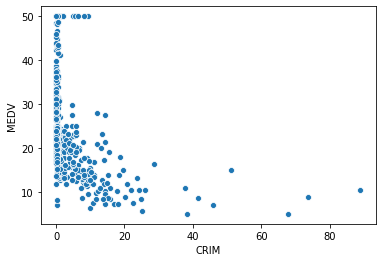

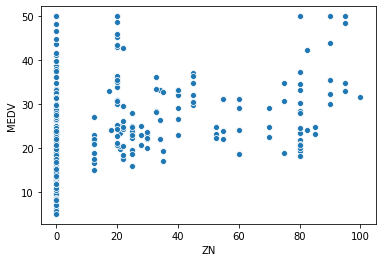

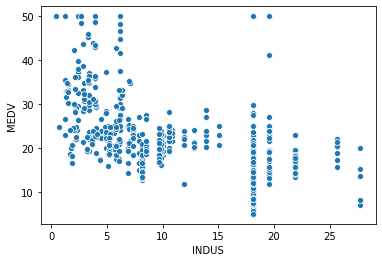

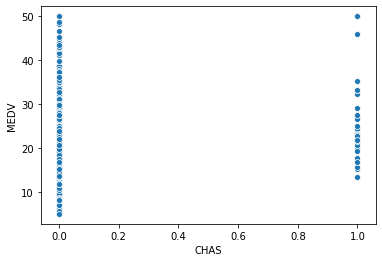

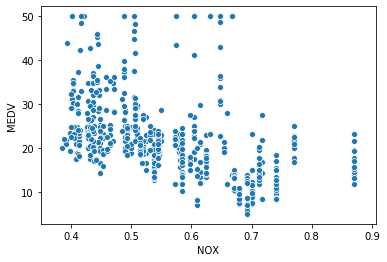

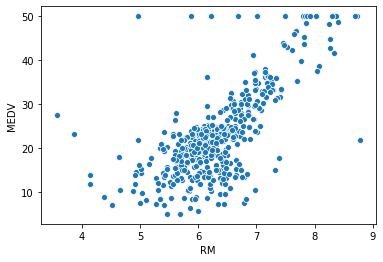

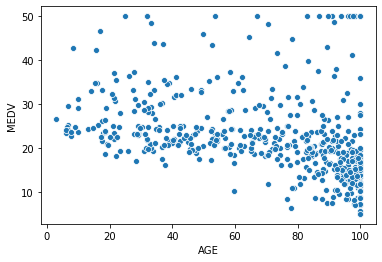

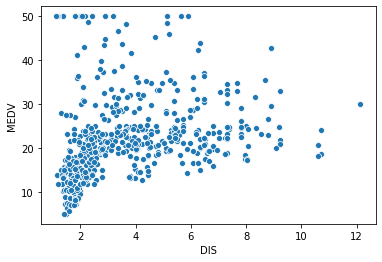

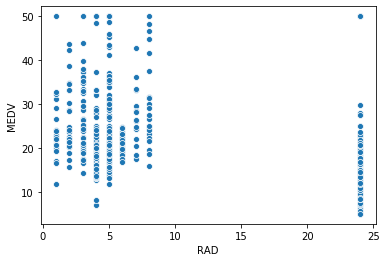

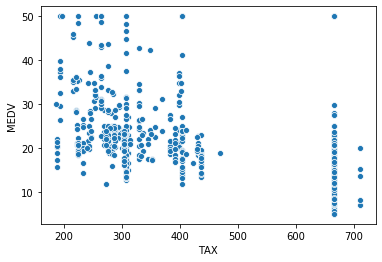

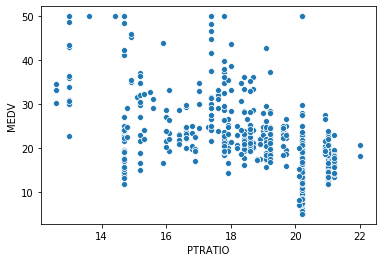

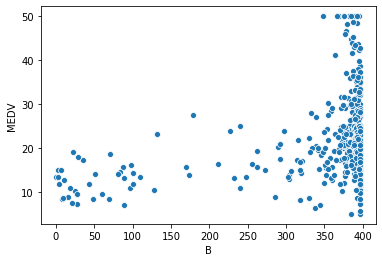

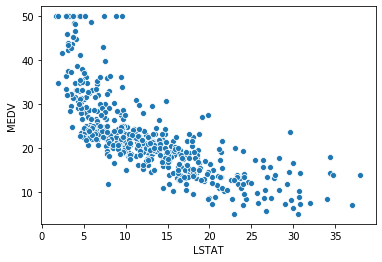

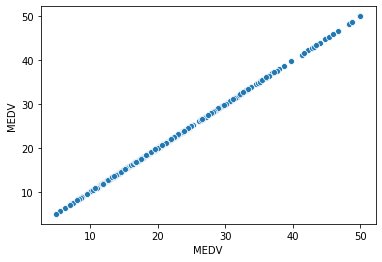

In [47]:
cols=df.columns.to_list()
for i in range(len(cols)):
    p=sns.scatterplot(x=cols[i], y='MEDV', data=df)
    plt.show()

## Observations
- LSTAT and MEDV may be negative correlated
- MEDV and RM show positive correlation

# Remove any of the one variable from the dataset if correlation is greater than 0.9. 
Example: (X1 and X2 are highly correlated to each other. Correlation value between X1 and X2 is 0.92, then  drop X1 or X2) 


In [48]:
df.corr()[df.corr()>0.9]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


### Observation:
- columns TAX and RAD have high correlation. Hence dropping RAD


In [49]:
df.drop(columns=['RAD'],axis=1,inplace=True)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7


## Split the data into training and test with a split ratio of 80-20(80% of the data into training data and 20% of the data into testing)

In [50]:
# Splitting data into Input and Output
X = df.drop(['MEDV'],axis = 1)
y = df['MEDV']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Apply feature scaling on the input columns, and build the Multiple Linear Regression Model. Check the performance on training and testing. Write your inferences on performance metrics and error metrics.

In [51]:
### Feature Scaling
from sklearn.preprocessing import scale
scale_data= scale(df)
df= pd.DataFrame(scale_data)


In [52]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Predicting training data
y_train_pred = lr.predict(X_train)

In [54]:
# Checking Performance on traning data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_train,y_train_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_train,y_train_pred))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1) )
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)))

R^2 : 0.7659630642413423
Adjusted R^2 : 0.7587803449853221
MAE: 3.137081963319567
MSE: 19.926775380202148
RMSE 4.463941686469722


In [55]:
# Test the model on testing data
y_test_pred = lr.predict(X_test)
y_test_pred

array([26.7289348 , 22.88350282, 28.8965238 , 11.80748085, 21.97888068,
       19.80847964, 19.46005354, 20.84394773, 19.01009502, 21.32546067,
        7.08511109, 16.15672207, 16.56740613,  5.1202732 , 40.81742942,
       32.89143533, 21.34885745, 37.41552179, 31.04313567, 23.04303563,
       24.78048639, 24.73918686, 21.54821182, 29.87039846, 21.99416215,
        9.27416431, 18.11103208, 19.12593835, 36.48039743, 21.82560603,
       17.47593929, 17.11197288, 19.64649961, 23.42742195, 29.07377725,
       19.01286368, 11.00380606, 24.16983584, 17.03783711, 14.5460208 ,
       25.5894178 , 20.47452353, 24.07716719, 14.47748335, 25.55550762,
       25.13772874, 19.31218023, 24.15837617, 10.58999192, 25.38947798,
       22.59952151, 18.1741546 , 23.79052666, 30.33858839, 14.62043327,
       21.51816798, 21.40292355, 16.6382719 , 14.86691882, 22.16311307,
       19.08900288, 21.7924526 , 32.54903647, 30.64856874, 16.91484982,
       33.53522359, 18.1260997 , 19.53167032, 18.6846626 , 22.68

In [56]:
# Performance of Testing data
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('R^2 :', r2_score(y_test,y_test_pred))
print('Adjusted R^2 :',1 - (1 - r2_score(y_test,y_test_pred))*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1) )
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2 : 0.5609532711220275
Adjusted R^2 : 0.5017559593631998
MAE: 3.9573816494552103
MSE: 35.75088980776619
RMSE 5.979204780551189
